<font size="5">**Structure functions to study 2-dimensional fields** </font>

This script illustrate how to use the functions of this package to characterize the roughness of images through high order structure functions.

In [2]:
# We load the needed packages
import numpy as np
import matplotlib.pyplot as plt
from Structure_functions import Incrs_anisotropic_generator2d, compute_moments_2D, polar_axis, field_2D_polar

We load the 2-dimensional field. In this example we use simply a Gaussian White noise. However, interesting images of ocean surface roughness can be found at https://www.seanoe.org/data/00456/56796/

In [2]:
image=np.random.randn(256,256)
# We normalize the image by centering and standarizing it
tmp=(image-np.nanmean(image))/np.nanstd(image)

In [3]:
# Definition of scales
scalesx=np.arange(-40,41,1)
scalesy=np.arange(-40,41,1)

# Definition of order of the structure functions
ps=np.array((2,3))

# Initialization of matrix
S=np.zeros((len(ps),len(scalesy),len(scalesx)))
S3norm=np.zeros((len(scalesy),len(scalesx)))

# Estimation of structure functions for each combination of scales (scalex,scaley)
for isx in range(len(scalesx)):
    for isy in range(len(scalesy)):  
        
        scalex=scalesx[isx]
        scaley=scalesy[isy]
        
        if scalex!=0 or scaley !=0:
            incrs = Incrs_anisotropic_generator2d(tmp, scalex, scaley)
            S[:,isy,isx]=compute_moments_2D(incrs, moms=ps)
            # Normalizing the increments avoid the effects of variance on higher order moments
            incrs=(incrs-np.mean(incrs))/np.std(incrs)
            S3norm[isy,isx]=compute_moments_2D(incrs, moms=3)
            
# We avoid the zero in the middle (we can not generate increment of size lx=ly=0)
S2=np.squeeze(S[0,:,:])
S2[40,40]=np.nan
S3norm[40,40]=np.nan
S2[40,40]=np.nanmean(S2[40-1:40+2,40-1:40+2])
S3norm[40,40]=np.nanmean(S3norm[40-1:40+2,40-1:40+2])

# We convert to polar coordinates
axis_t, axis_r, size = polar_axis(S2, n_theta=-1)
S2_polar = field_2D_polar(S2, n_theta=-1)
S3_polar = field_2D_polar(S3norm, n_theta=-1)

Plot of results

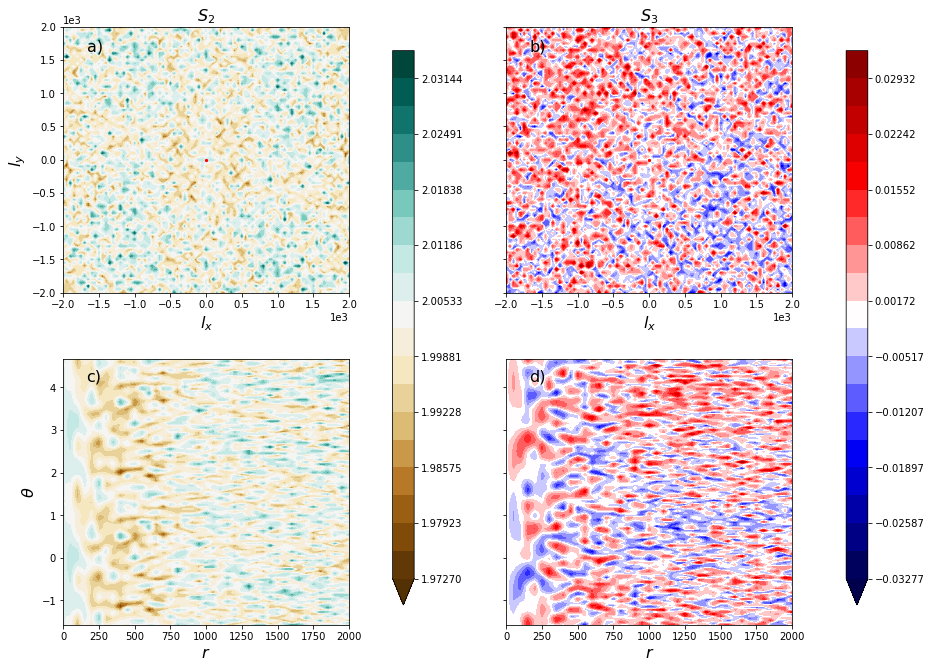

In [23]:
resolution=50 # Pixel size

# We define the levels of the colorbar of the plots
levels = np.linspace(np.amin(S2), np.amax(S2), 20)
levels2 = np.linspace(np.amin(S3norm), np.amax(S3norm), 20)

# We make the plot
fig, ax = plt.subplots(2, 2, figsize=(15, 11))
fig.subplots_adjust(wspace=0.55, hspace=0.25)

img1 = ax[0,0].contourf(scalesx*resolution,scalesx*resolution,S2, levels=levels, extend='min',cmap='BrBG')
ax[0,0].scatter(0,0,s=5,c='r')
ax[0,0].set_ylabel(r'$l_y$', fontsize=16)
ax[0,0].set_xlabel(r'$l_x$', fontsize=16)
ax[0,0].text(-1670,1640,'a)', fontsize=16)
ax[0,0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax[0,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,0].set_title(r'$S_2$', fontsize=16)

## Subfigure 2
img2 = ax[0,1].contourf(scalesx*resolution,scalesx*resolution,S3norm, levels=levels2, extend='min',cmap='seismic')
ax[0,1].scatter(0,0,s=5,c='r')
ax[0,1].text(-1670,1640,'b)', fontsize=16)
ax[0,1].set_yticklabels([])
ax[0,1].set_xlabel(r'$l_x$', fontsize=16)
ax[0,1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax[0,1].set_title(r'$S_3$', fontsize=16)

# subfigure 3
img3 = ax[1,0].contourf(axis_r*resolution,axis_t,S2_polar, levels=levels, extend='min',cmap='BrBG')
ax[1,0].set_xlabel(r'$r$', fontsize=16)
ax[1,0].set_ylabel(r'$\theta$', fontsize=16)
ax[1,0].text(160,4.15,'c)', fontsize=16)

## Subfigure 4
img4 = ax[1,1].contourf(axis_r*resolution,axis_t,S3_polar, levels=levels2, extend='min',cmap='seismic')
ax[1,1].set_yticklabels([])
ax[1,1].set_xlabel(r'$r$', fontsize=16)
ax[1,1].text(160,4.15,'d)', fontsize=16)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.43, 0.15, 0.02, 0.7])
cbar=fig.colorbar(img3, cax=cbar_ax)
#cbar.set_ticks([0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2])
#cbar.set_ticklabels(['0.8', '1.0', '1.2', '1.4', '1.6' ,'1.8' ,'2.0','2.2'])

fig.subplots_adjust(right=0.8)
cbar_ax2 = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar2=fig.colorbar(img4, cax=cbar_ax2)
#cbar.set_ticks([0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2])
#cbar.set_ticklabels(['0.8', '1.0', '1.2', '1.4', '1.6' ,'1.8' ,'2.0','2.2'])
plt.show() 

We save the results

In [ ]:
np.savez('StructureFunctions_Incrs_myimage.npz', S2=S2, S3norm=S3norm, ps=ps, scalesx=scalesx, scalesy=scalesy)